smCCP analysis of tmRNA
=======================

This is an example RNAvigate workflow for visualization of smCCP analysis of tmRNA.

Data were originally published by Mustoe et. al. 2019. [publication pdf](https://weekslab.com/wp-content/uploads/sites/9/2021/01/2019_am_pnas.pdf)

The supplemental data of this publication includes processed Shapemapper2 and Pairmapper data, reference sequence and secondary structure of tmRNA, and DMS/PAIR-constrained structure predictions. To obtain Ringmapper files, the raw sequencing reads were downloaded from the GEO (GSE135211), and processed with Shapemapper2 and Ringmapper. PDB cryo-em structure 6q9A was downloaded from the PDB, and the tmRNA chain was isolated using pymol. This results in all of the files needed in this example:
- 6q9A_tmRNA.pdb
- cellfree_tmRNA_profile.txt
- cellfree_tmRNA_rings.txt
- cellfree_tmRNA-pairmap.txt
- cellfree_tmRNA.all.f.ct
- incell_tmRNA_profile.txt
- incell_tmRNA_rings.txt
- incell_tmRNA-pairmap.txt
- incell_tmRNA.all.f.ct
- tmRNA.ct
- tmRNA.fa

## Import RNAvigate

In [1]:
%load_ext autoreload
%autoreload 2
import rnavigate as rnav

In [2]:
cf = rnav.Sample(
    sample="Cell-free",
    dmsmap="cellfree_tmRNA_profile.txt",
    ringmap="cellfree_tmRNA_rings.txt",
    pairmap="cellfree_tmRNA-pairmap.txt",
    ct="tmRNA.ct",
    compct="cellfree_tmRNA.all.f.ct",
    pdb={"filepath":"6q9A_tmRNA.pdb",
         "chain":"4",
         "fasta":"tmRNA.fa",
         "offset":0})
ic = rnav.Sample(
    sample="In-cell",
    dmsmap="incell_tmRNA_profile.txt",
    ringmap="incell_tmRNA_rings.txt",
    pairmap="incell_tmRNA-pairmap.txt",
    ct="tmRNA.ct",
    compct="incell_tmRNA.all.f.ct",
    pdb={"filepath":"6q9A_tmRNA.pdb",
         "chain":"4",
         "fasta":"tmRNA.fa",
         "offset":0})
samples = [cf, ic]

In [3]:
dshape = rnav.analysis.DeltaSHAPE(cf, ic)
dshape.plot()

KeyError: (0, 'z_factors')

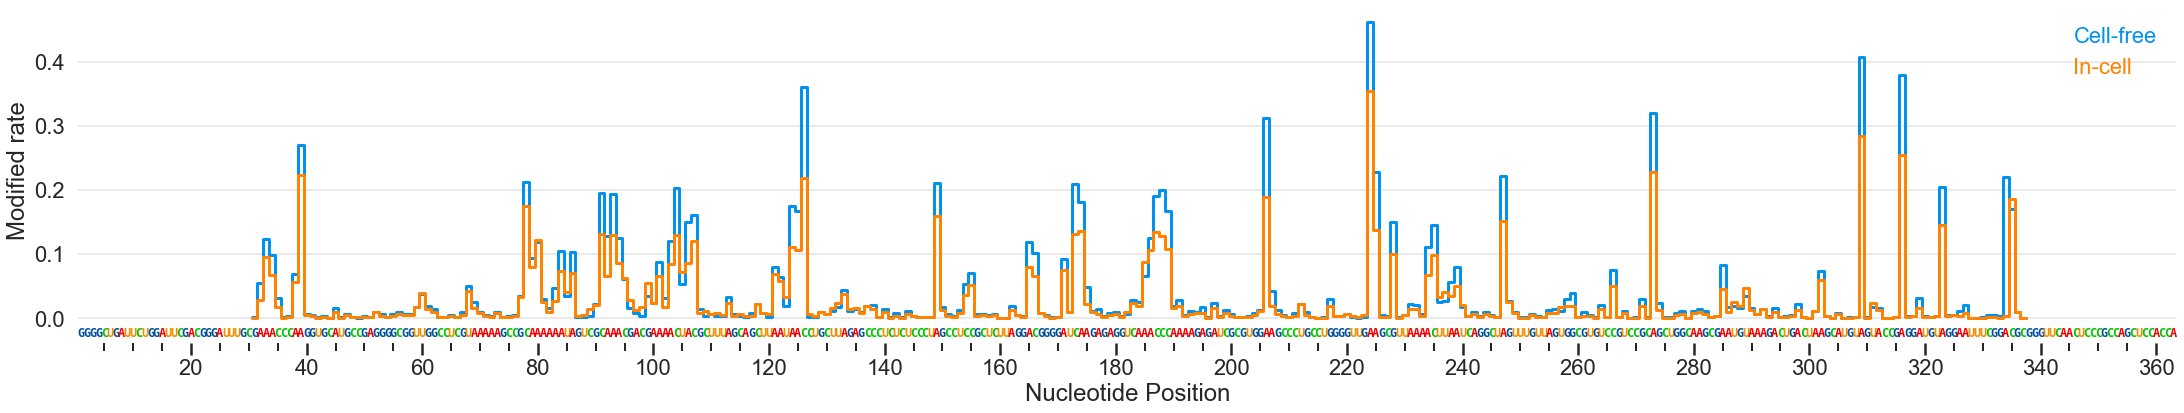

In [3]:
plot = rnav.plot_skyline_multisample(samples=samples, columns="Modified_rate")

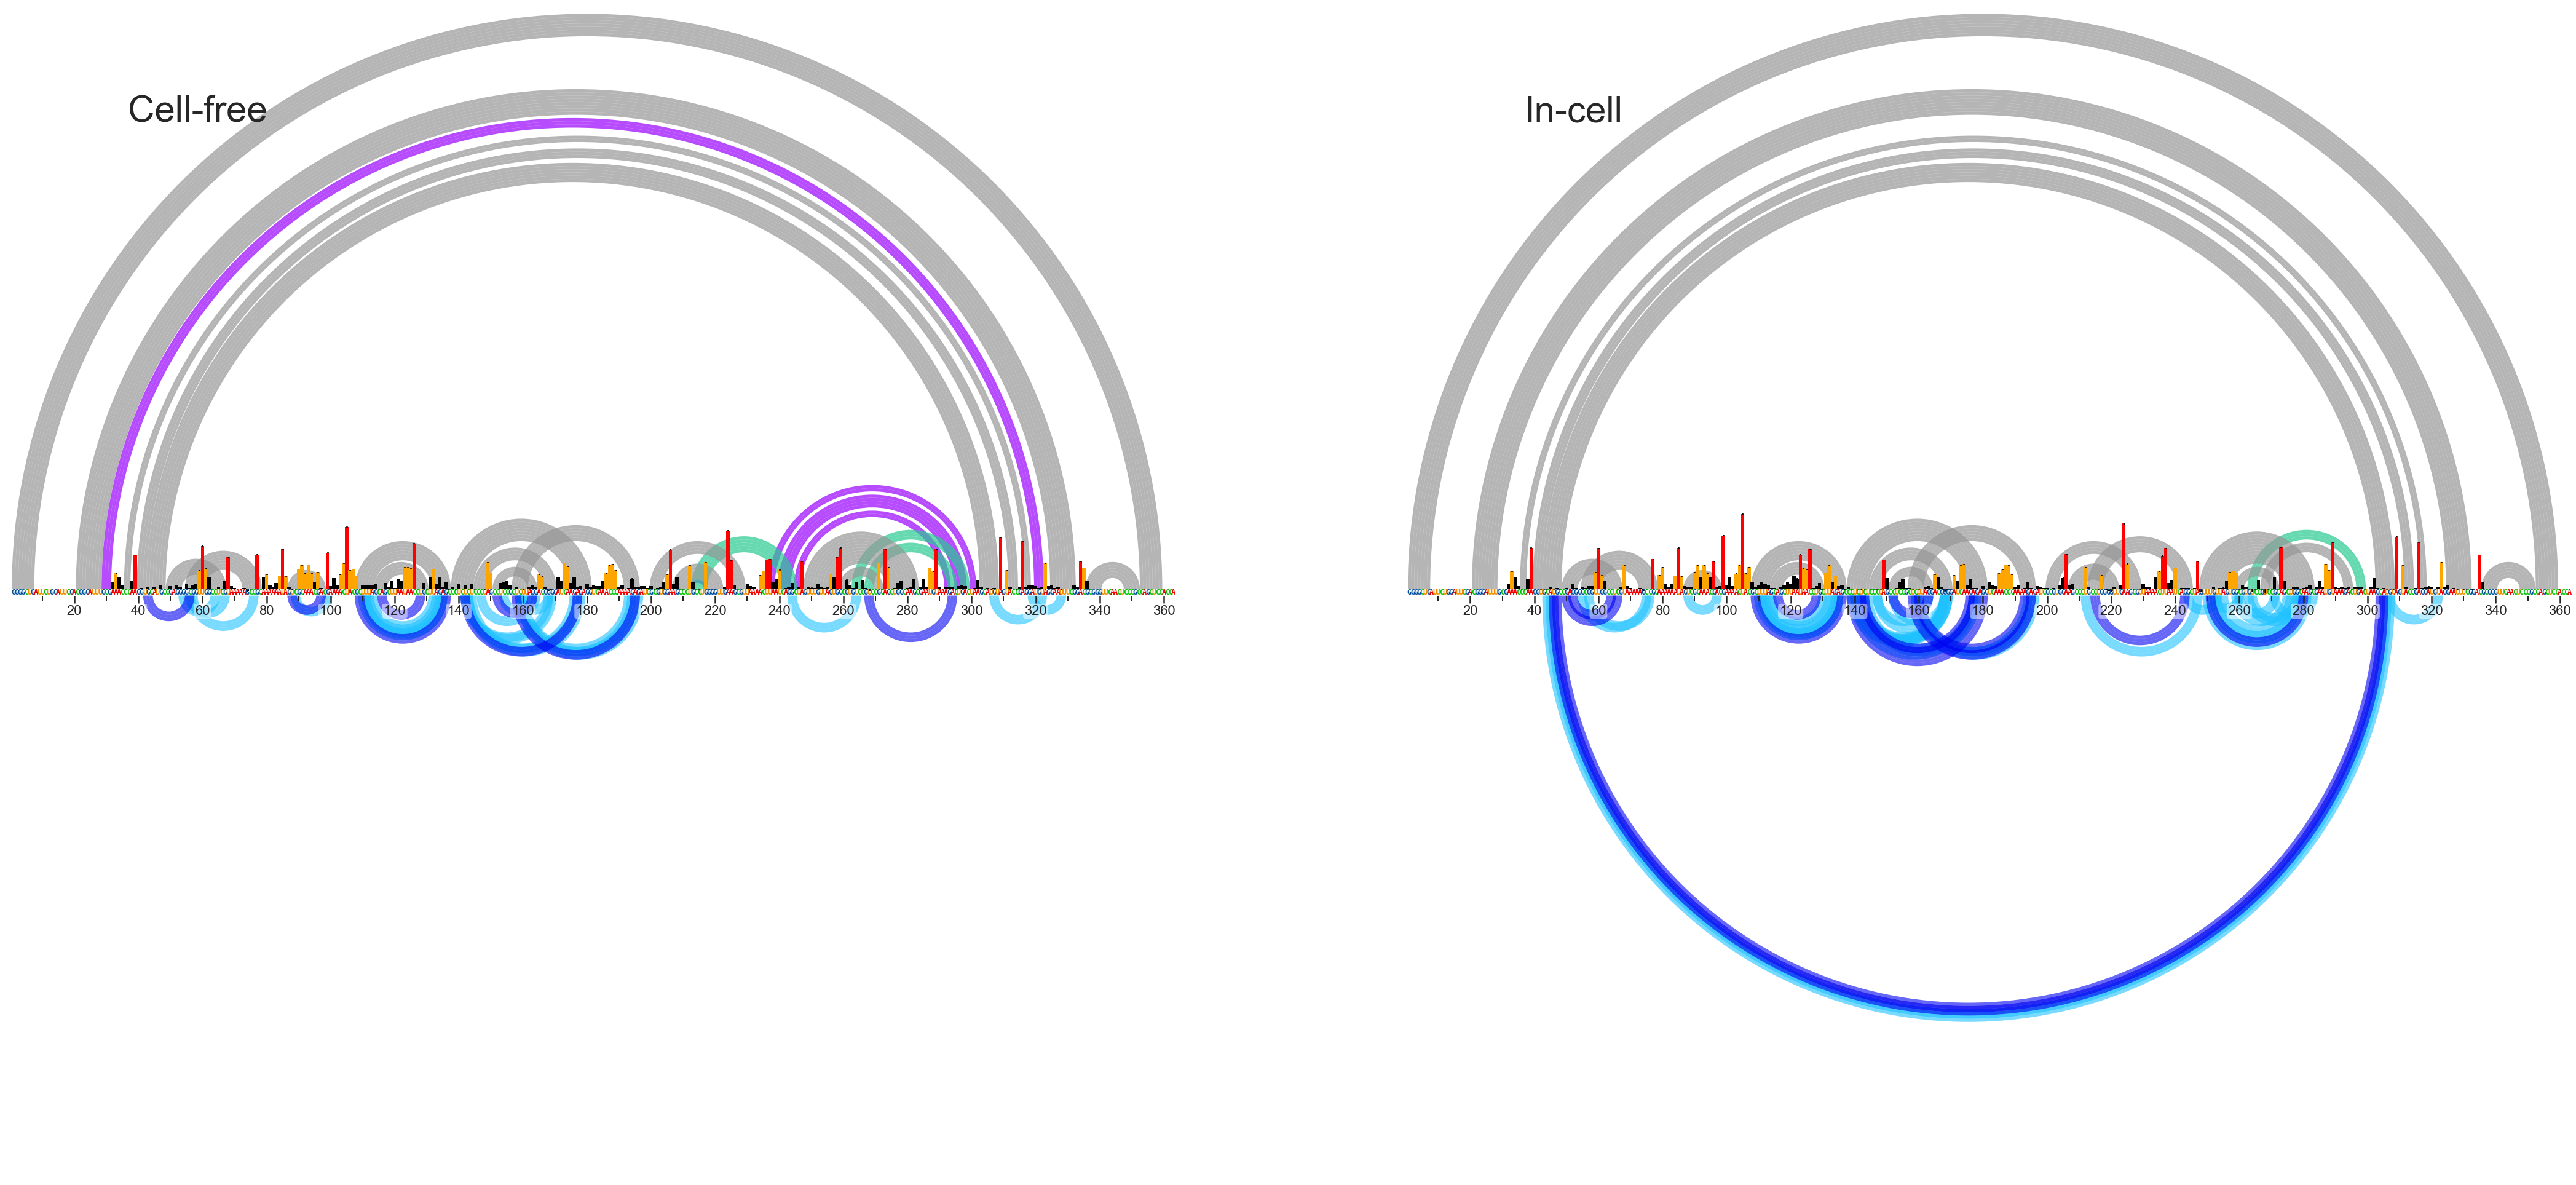

In [4]:
plot = rnav.plot_arcs_multisample(
    ct="ct",
    comp="compct",
    samples=samples,
    profile="dmsmap",
    interactions="pairmap",
    colorbar=False,
)
plot.save("tmRNA.svg")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

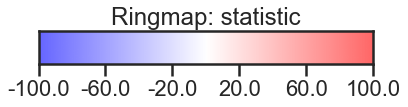

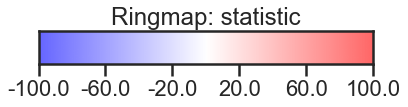

In [5]:
plot = rnav.plot_mol_multisample(
    samples=samples,
    profile="dmsmap",
    nt_color="grey",
    interactions="ringmap",
    interactions_filter={
        "positive_only": True,
        "Statistic_ge": 50,
        "min_cd": 15,
        "ss_only":True},
    width=800,
    height=800,
    hide_cylinders=True,
    background_alpha=0)